In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [2]:
base_dir = r'E:\Hope\AI Course Tamil\Week11-Deep Learning Module\Flower Detection\Dataset'
img_size = 180
batch = 32

In [ ]:
##Load images into array as dataset

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4318 files belonging to 5 classes.
Using 3455 files for training.
Found 4318 files belonging to 5 classes.
Using 863 files for validation.


In [4]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

In [6]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [7]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [8]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [9]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [12]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 [==============================] - 128s 1s/step - loss: 1.2835 - accuracy: 0.4576 - val_loss: 1.0611 - val_accuracy: 0.5527
Epoch 2/15
108/108 [==============================] - 106s 986ms/step - loss: 1.0498 - accuracy: 0.5734 - val_loss: 0.9593 - val_accuracy: 0.6211
Epoch 3/15
108/108 [==============================] - 121s 1s/step - loss: 0.9280 - accuracy: 0.6313 - val_loss: 0.9021 - val_accuracy: 0.6431
Epoch 4/15
108/108 [==============================] - 140s 1s/step - loss: 0.8682 - accuracy: 0.6721 - val_loss: 0.8705 - val_accuracy: 0.6477
Epoch 5/15
108/108 [==============================] - 132s 1s/step - loss: 0.7801 - accuracy: 0.6987 - val_loss: 0.8825 - val_accuracy: 0.6466
Epoch 6/15
108/108 [==============================] - 123s 1s/step - loss: 0.7392 - accuracy: 0.7175 - val_loss: 0.8185 - val_accuracy: 0.6860
Epoch 7/15
108/108 [==============================] - 123s 1s/step - loss: 0.7004 - accuracy: 0.7300 - val_loss: 0.8170 - val_accuracy: 0.6

In [13]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [14]:
classify_images('sample/rose.jpg')

1/1 [==============================] - 1s 1s/step


'The Image belongs to rose with a score of 98.50226044654846'

In [15]:
from tensorflow.keras.models import load_model 
model.save('Flower_recognition_Model.h5') 



1/1 [==============================] - 0s 90ms/step


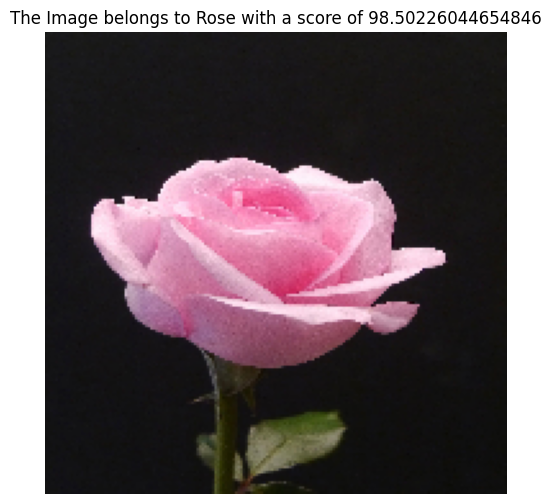

The Image belongs to Rose with a score of 98.50226044654846


In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load your pre-trained model
model = tf.keras.models.load_model('Flower_recognition_Model.h5')

def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)

    # Display the image
    plt.figure(figsize=(6,6))
    plt.imshow(input_image_array.astype(np.uint8))
    plt.title(outcome)
    plt.axis('off')
    plt.show()

    return outcome

flower_names = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

outcome = classify_images('sample/rose.jpg')
print(outcome)
